<a href="https://colab.research.google.com/github/ameliachoi/coursera-IBM-data-science/blob/master/coursera_machine_learning_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Coursera] Machine Learning with Python**
# Section 3. K-Nearest Neighbors

## Table of Contents

1. About the dataset
2. Data Visualization and Analysis
3. Classification

---

### The visualization of the K-Nearest Neighbors algorithm

![image](https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png)

We want to predict what the star(test data point) is.

---

In [38]:
# load libraries

import itertools # 자신만의 반복자 만드는 모듈
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter # ticker: x축과 y축에 표시되는 값
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:

  1- Basic Service
  
  2- E-Service
  
  3- Plus Service
  
  4- Total Service


In [39]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-06-24 04:54:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.03s   

2020-06-24 04:54:21 (1.40 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [40]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


---

### Data Visualization and Analysis

In [41]:
# see how many of each class is in our dataset
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc3414e630>]],
      dtype=object)

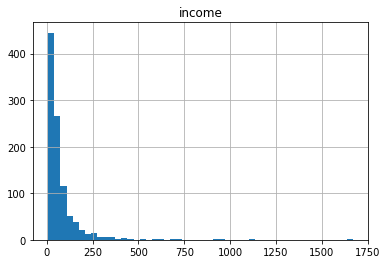

In [42]:
df.hist(column='income', bins=50)

#### Feature set

In [43]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [44]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [45]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

#### Normalize Data
Data Standardization give data zero mean and unit variance, it's good practice, especially for algorithms such as KNN which is based on distnace of cases:

In [46]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

#### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) # random_state : 데이터 분할 시 셔플이 이루어지는데 이를 위한 seed값
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


---

### Classification - K-Nearest neighbor (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

#### Training

In [49]:
k = 4
# train model and predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#### Predicting

In [50]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

#### Accuracy evaluation

In [51]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


Exercise: Build the model again, but this time with k=6.

In [52]:
neigh2 = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
neigh2

yhat2 = neigh2.predict(X_test)

print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat2))

Train set accuracy:  0.51625
Test set accuracy:  0.31


#### What about other K?

How can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model.

Then chose k = 1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set.

Repeat this process, increasing the k, and see which k is the best for your model. We can calculate the accuracy of KNN for different Ks.


In [53]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):

  # train model and predict
  neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

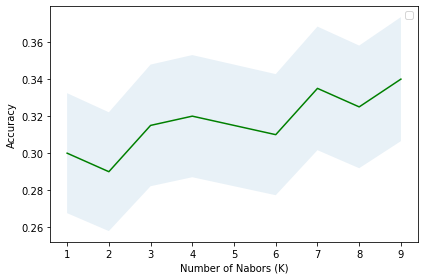

In [54]:
# plot model accuracy for different number of neighbors
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend('Accuracy ', '+/- 3xstd')
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout() # Automatically adjust subplot parameters to give specified padding
plt.show()

In [55]:
print('The best accuracy was with', mean_acc.max(), 'with k=', mean_acc.argmax()+1)

The best accuracy was with 0.34 with k= 9
